In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Model definition

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(3, (3, 3), padding="same", activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [5]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 3)         30        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 3)         0         
_________________________________________________________________
flatten (Flatten)            (None, 588)               0         
_________________________________________________________________
dense (Dense)                (None, 784)               461776    
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 469,656
Trainable params: 469,656
Non-trainable params: 0
__________________________________________________

## Model training

In [7]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3351 - accuracy: 0.9030
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0722 - accuracy: 0.9779
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0471 - accuracy: 0.9846
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0350 - accuracy: 0.9888
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0268 - accuracy: 0.9912


In [8]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0519 - accuracy: 0.9843


[0.05188654735684395, 0.9843000173568726]

## Model persistence

In [9]:
model_path = 'models/mnist_model.h5'
os.makedirs(os.path.dirname(model_path), exist_ok=True)

In [10]:
model.save(model_path, save_format='h5')

## Quick check - load model and run predictions

In [11]:
loaded_model = tf.keras.models.load_model(model_path)

In [12]:
y_preds = np.argmax(loaded_model.predict(x_test), axis=1)

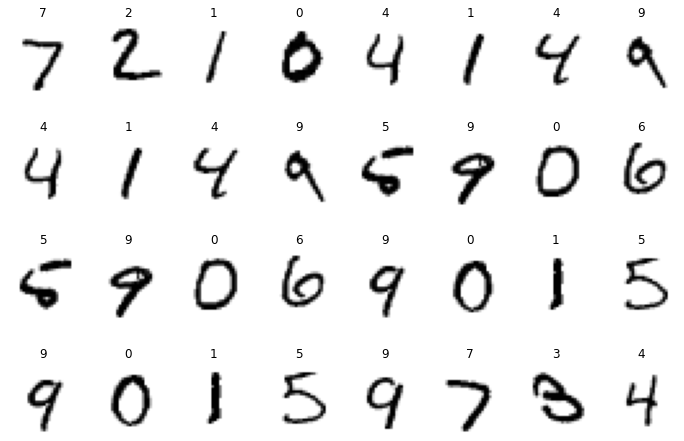

In [13]:
f, axarr = plt.subplots(4, 8, figsize=(12, 8))
for y in range(4):
    for x in range(8):
        idx = y*4 + x
        ax = axarr[y,x]
        ax.imshow(x_test[idx], cmap='gray_r')
        ax.axis('off')
        ax.set_title(y_preds[idx])
plt.show()

## Predictions on images

In [14]:
import os
import cv2
from glob import glob

In [15]:
img_paths = glob('../data/test_mnist_images/*.jpg')

In [16]:
for img_path in img_paths:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).reshape(1,28,28,1)
    pred = np.argmax(loaded_model.predict(img))
    print(f"Processed: {os.path.basename(img_path)}, shape: {img.shape}, prediction: {pred}")

Processed: img_test_0_104611.jpg, shape: (1, 28, 28, 1), prediction: 0
Processed: img_test_0_108808.jpg, shape: (1, 28, 28, 1), prediction: 0
Processed: img_test_1_108432.jpg, shape: (1, 28, 28, 1), prediction: 1
Processed: img_test_1_109796.jpg, shape: (1, 28, 28, 1), prediction: 1
Processed: img_test_2_100609.jpg, shape: (1, 28, 28, 1), prediction: 2
Processed: img_test_2_105037.jpg, shape: (1, 28, 28, 1), prediction: 2
Processed: img_test_3_104785.jpg, shape: (1, 28, 28, 1), prediction: 3
Processed: img_test_3_108226.jpg, shape: (1, 28, 28, 1), prediction: 3
Processed: img_test_4_101301.jpg, shape: (1, 28, 28, 1), prediction: 4
Processed: img_test_4_108378.jpg, shape: (1, 28, 28, 1), prediction: 4
Processed: img_test_5_102581.jpg, shape: (1, 28, 28, 1), prediction: 5
Processed: img_test_5_107559.jpg, shape: (1, 28, 28, 1), prediction: 5
Processed: img_test_6_105793.jpg, shape: (1, 28, 28, 1), prediction: 6
Processed: img_test_6_107959.jpg, shape: (1, 28, 28, 1), prediction: 6
Proces

## Batch predictions on images

In [17]:
img_batch = np.array([cv2.imread(p, cv2.IMREAD_GRAYSCALE) for p in img_paths]).reshape(-1,28,28,1)
print(img_batch.shape)

(20, 28, 28, 1)


In [18]:
img_batch_preds = np.argmax(loaded_model.predict(img_batch), -1)

In [19]:
[i for i in zip(img_paths, img_batch_preds)]

[('../data/test_mnist_images/img_test_0_104611.jpg', 0),
 ('../data/test_mnist_images/img_test_0_108808.jpg', 0),
 ('../data/test_mnist_images/img_test_1_108432.jpg', 1),
 ('../data/test_mnist_images/img_test_1_109796.jpg', 1),
 ('../data/test_mnist_images/img_test_2_100609.jpg', 2),
 ('../data/test_mnist_images/img_test_2_105037.jpg', 2),
 ('../data/test_mnist_images/img_test_3_104785.jpg', 3),
 ('../data/test_mnist_images/img_test_3_108226.jpg', 3),
 ('../data/test_mnist_images/img_test_4_101301.jpg', 4),
 ('../data/test_mnist_images/img_test_4_108378.jpg', 4),
 ('../data/test_mnist_images/img_test_5_102581.jpg', 5),
 ('../data/test_mnist_images/img_test_5_107559.jpg', 5),
 ('../data/test_mnist_images/img_test_6_105793.jpg', 6),
 ('../data/test_mnist_images/img_test_6_107959.jpg', 6),
 ('../data/test_mnist_images/img_test_7_105425.jpg', 7),
 ('../data/test_mnist_images/img_test_7_109690.jpg', 7),
 ('../data/test_mnist_images/img_test_8_105226.jpg', 8),
 ('../data/test_mnist_images/im

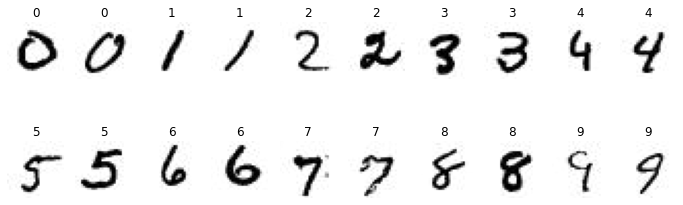

In [20]:
f, axarr = plt.subplots(2, 10, figsize=(12, 4))
for y in range(2):
    for x in range(10):
        idx = y*10 + x
        ax = axarr[y,x]
        ax.imshow(img_batch[idx], cmap='gray_r')
        ax.axis('off')
        ax.set_title(img_batch_preds[idx])
plt.show()